In [94]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import math

In [95]:
btc_hist_data = pd.read_excel("1\\Bitcoin Historical Data.xlsx").replace([',','%'],'')
btc_hist_data = btc_hist_data.iloc[::-1]

Date = btc_hist_data["Date"]
btc_close_price = btc_hist_data['Price']


median / ma / ema / wma / conv / fourier / laplas / wavelet /  modulation/demodulation / correlation / cepstrum

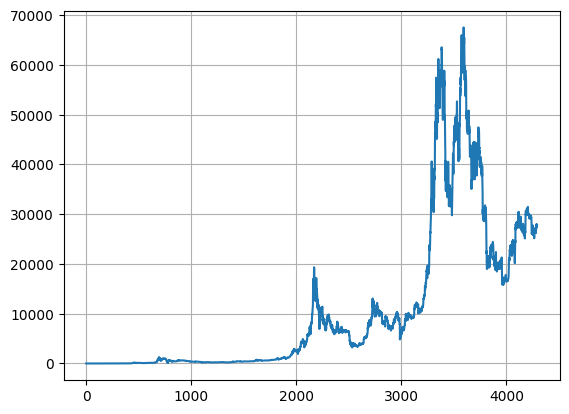

In [96]:
fig =plt.figure(1)
plt.plot(btc_close_price.values)

plt.grid()
plt.show()

Moving Median - The mid point value

In [97]:
def MM(df, period = 14 ):
    MM = df.rolling(period).median()
    return MM


Moving Average

In [98]:
def MA(df, period = 14 ):
    MA = df.rolling(period).mean()
    return MA

Exponential Moving Average 

In [99]:
def EMA(df, period = 14 ):
    EMA = df.ewm(period).mean()
    return EMA

In [100]:
ema =EMA(btc_close_price)

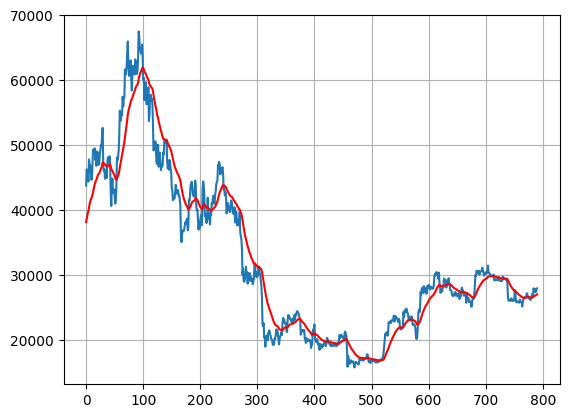

In [101]:
fig =plt.figure(1)
plt.plot(btc_close_price[3500:-1].values)
plt.plot(ema.values[3500:-1] , color = 'red')
plt.grid()
plt.show()

In [102]:
df = pd.DataFrame([ 1 , 2 , 3 , 4 , 5 ])

In [115]:
ewm_cum = df.ewm(1).mean()

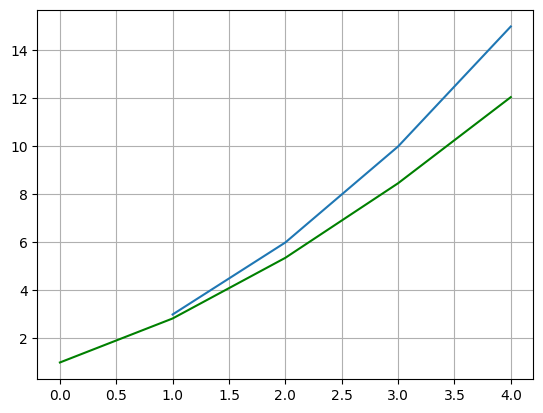

In [113]:
fig =plt.figure(1)
plt.plot(ex_cum.values)

plt.plot(ewm_cum.values , color = 'green')
plt.grid()
plt.show()